<a href="https://colab.research.google.com/github/ThitiwatJtrsn/DWDM21/blob/main/Data_Preprocessing(Chapter_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง

In [ ]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os # จัดการไฟล์และ path

In [ ]:
path = '/content/drive/My Drive/DWDM2021_DATA'

In [ ]:
data_cases = pd.read_csv(os.path.join(path,'confirmed-cases (5).csv'))
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


Meta Data (Data ที่ใช้อธิบาย Data)

ชี้ข้อมูลในตาราง

# ชี้แบบธรรมดา ใช้ [ชื่ออ column][index]

In [ ]:
data_cases['risk']

0         คนต่างชาติเดินทางมาจากต่างประเทศ
1         คนต่างชาติเดินทางมาจากต่างประเทศ
2         คนต่างชาติเดินทางมาจากต่างประเทศ
3         คนต่างชาติเดินทางมาจากต่างประเทศ
4         คนต่างชาติเดินทางมาจากต่างประเทศ
                        ...               
543301                    ทัณฑสถาน/เรือนจำ
543302                    ทัณฑสถาน/เรือนจำ
543303                    ทัณฑสถาน/เรือนจำ
543304                    ทัณฑสถาน/เรือนจำ
543305                                 NaN
Name: risk, Length: 543306, dtype: object

In [ ]:
data_cases['risk'][678]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

In [ ]:
data_cases.iloc[-10,4]

47.0

# missing Values

In [ ]:
data_cases.describe()

,No.,age
count,543305.000000,491048.000000
mean,271653.000000,35.519252
std,156838.788338,16.197363
min,1.000000,1.000000
25%,135827.000000,25.000000
50%,271653.000000,34.000000
75%,407479.000000,46.000000
max,543305.000000,108.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7faf0626b050>],
 'caps': [<matplotlib.lines.Line2D at 0x7faf06274090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faf0627a0d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faf06274b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faf12060150>,
  <matplotlib.lines.Line2D at 0x7faf0626bb10>]}

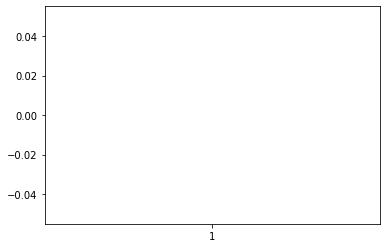

In [ ]:
from matplotlib import pyplot as plt #มันมีค่า missing เลยplot ไม่ได้
plt.boxplot(data_cases['age'])

#Missing Values




*   NaN = Not a Number
*   Null
* NA = Not Available



In [ ]:
data_cases.isnull()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
543301,False,False,False,False,False,False,True,False,False,False,True
543302,False,False,False,False,False,False,True,False,False,False,True
543303,False,False,False,False,False,False,True,False,False,False,True
543304,False,False,False,False,False,False,True,False,False,False,True


In [ ]:
data_cases.isnull().any() #สรุปข้อมูลเป็นรายคอลัม

No.                      True
announce_date            True
Notified date            True
sex                      True
age                      True
Unit                     True
nationality              True
province_of_isolation    True
risk                     True
province_of_onset        True
district_of_onset        True
dtype: bool

Handlind Missing Value 1 (ลบค่า missing) 

{'boxes': [<matplotlib.lines.Line2D at 0x7faf05a7a750>],
 'caps': [<matplotlib.lines.Line2D at 0x7faf05a64710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faf05a2ced0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faf05a2cb10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faf05d58590>,
  <matplotlib.lines.Line2D at 0x7faf05a642d0>]}

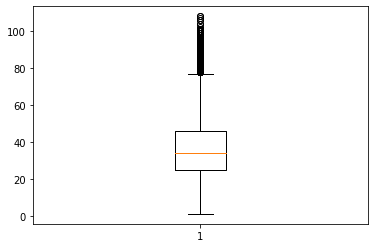

In [ ]:
plt.boxplot(data_cases['age'].dropna())

In [ ]:
data_cases.dropna()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
47,48.0,6/3/2020,4/3/2020,ชาย,43.0,ปี,United Kingdom,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,คลองตัน
124,125.0,6/3/2021,5/3/2021,หญิง,55.0,ปี,Thailand,ปทุมธานี,Cluster ตลาดพรพัฒน์,ปทุมธานี,ธัญบุรี
161,162.0,17/3/2020,21/3/2020,ชาย,14.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,เมือง
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
186,187.0,18/3/2020,16/3/2020,ชาย,36.0,ปี,Thailand,ร้อยเอ็ด,สนามมวย,ร้อยเอ็ด,เชียงขวัญ
...,...,...,...,...,...,...,...,...,...,...,...
543098,543099.0,28/7/2021,27/7/2021,หญิง,63.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,พุทธมณฑล
543099,543100.0,28/7/2021,27/7/2021,ชาย,67.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,หนองแขม
543100,543101.0,28/7/2021,27/7/2021,หญิง,68.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดุสิต
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ


In [ ]:
data_cases.dropna().shape

(385643, 11)

In [ ]:
data_cases.dropna().shape[0]

385643

###Quiz 3 หาว่า การทำ dropna() ทำให้ข้อมูลหายไปกี่ %




```
size before drop = 1000
size after drop = 10
we loss 99% of data
```







In [ ]:
after = data_cases.shape[0] - data_cases.dropna().shape[0]
after

157663

In [ ]:
data_af = (after/data_cases.shape[0])*100
data_af

29.019189922437818

#Quiz3.1 หาว่าการทำ dropna() แบบเลือก drop เฉพาะ column ที่เราสนใจ (age) ทำให้ข้อมูลหายไปกี่ %

In [ ]:
removed = data_cases.shape[0] - data_cases_nomissingAge.shape[0]

print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases_nomissingAge.shape[0]}')
print(f'we loss {(removed/data_cases.shape[0])*100} % of data')

#Handling Misiing Value 2 (แทนค่าด้วย class ใหม่ (unknown))

In [ ]:
data_cases

In [ ]:
data_cases[['risk']] = data_cases[['risk']].fillna('ไม่มีข้อมูล') #fillna เป็นการเติมค่า

In [ ]:
set(data_cases['risk']) #set เหมือน set ทางคณิตศาสตร์

#Handling Misiing Value 3 (แทนค่าด้วย class ใหม่ (ค่าที่เหมาะสม))

In [ ]:
set(data_cases['Unit']) #คิดค่าที่เหมาะสมว่าอันไหนไม่กรอกให้แทนเป็นปี

In [ ]:
data_cases[['Unit']] = data_cases[['Unit']].fillna('ปี?') #เติมค่าลงไปเป็น ปี?

In [ ]:
data_cases.isnull().any() #มาดูว่าเราจำกัดไปถึงไหนแล้ว